# t-SNE

t-Distributed Stochastic Neighbor Embedding is a tool for visualization. It reduces the dimensionaltiy of data to 2 to 3 dimensions so that it can be plotted easily. t-SNE can help us decide whether classes are seperable in some linear or nonlinear representation. 

t-SNE is based on probability distributions with random wlak on neighborhood graphs to find the structure wihtin the data. 
Barnes-Hut simulation, that recursively divides n-bodies into groups by storing them in an octree ( or quadtree is a 2D simulation)

## Properties 
1. t-SNE is a non-linear dimensionality reduction techinique that retains both the local and global structure of the data at the same time. There are several other non-linear dimensionality reduction techniques (Sammon mapping, Isomap, LLE, CCA, SNE, MVU, and Laplacian Eigenmaps) that fail to accomplish this.


## Limitations
1. It is highly recommended to use another dimensionality reducction technique (PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (~50). This will suppress noise and speed up the computation of pairwise distances. 
2. The bounding box for clusters means nothing in terms of standard deviation or dispersal of the cluster. 
3. Random noise doesn't always look random.
4. A major feature of t-SNE is a tunable parameter 'perplexity', which says how to balance attention between local and global aspects of the data. Typical values are between 5 and 50 according to the original paper but to get the most from t-sne may mean analyzing multiple plots with different perplexities. In low levels of perplexity local variations dominate. Larger values for perplexity can help reveal global geometry.   
5. t-SNE has a cost function that is not convex where different initializations can get different results. 

## Psuedo Code
1. t-SNE converts high dimensional euclidean distance between points into conditional probabilities that represent similarities. Point $x_i$ would choose $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gausssian centered at $x_i$ 
2. For the low dimensional counterparts $y_1$ and $y_j$ of the high dimensional datapoints $x_i$ and $x_j$ it is possible to compute a conditional probability. These steps compute a conditional probability of similiarity between pairs of points in low and high dimensional space.
3. t-SNE computes pairwise conditional probabilities and tries to minimize the sum of the difference of the probabilities in higher and lower dimensionst, more specifically after computing probabilites t-SNE then minimizes the sum of the Kullback-Leibler divergence (also called relative entropy, this is a measure of how one probability diverges from a second expected probabilty distribution, in a simple case a KL divergence of 0 indicates that we can expect similar, if not the same behavior of two different distributions- the meaure is normalized) with a gradient descent method.
4. The last part is the perplexity- a user defined variable. The variance of the distribution over each high-dimensional data point is unlikely to be optimal for all data points because the density is likely to vary- in densor regoins small variance is more appropriate. The perplexity can be seen as a smooth measure of effective number of neighbors. The gradient can be interpretted as a series of springs that attract or repel if the distance on the map is too small or too large to represent the similarities between two high dimensional datapoints. 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE


In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
x_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
x_pca=PCA().fit_transform(iris.data)

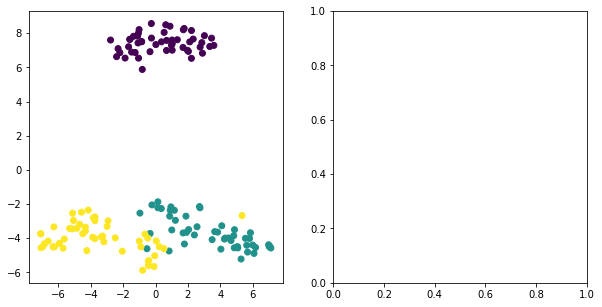

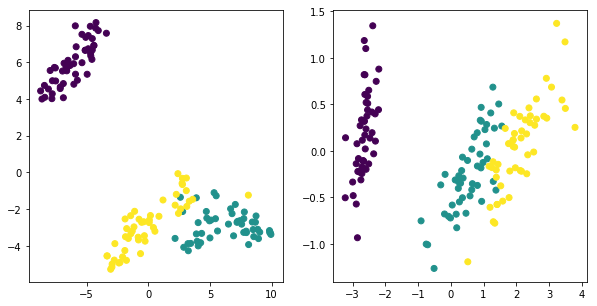

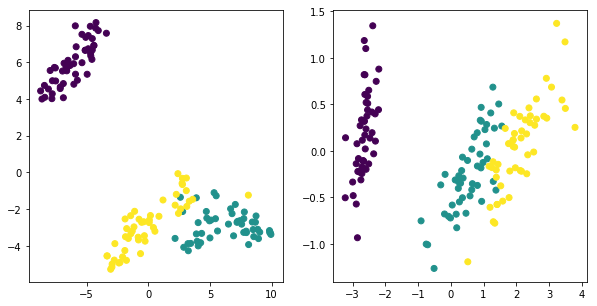

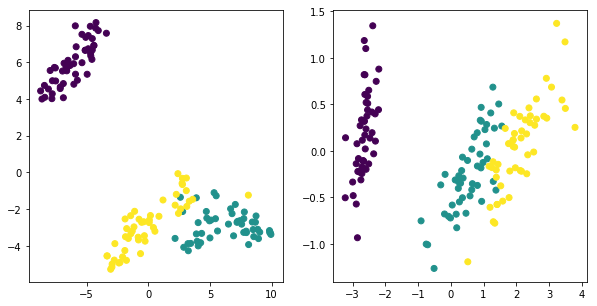

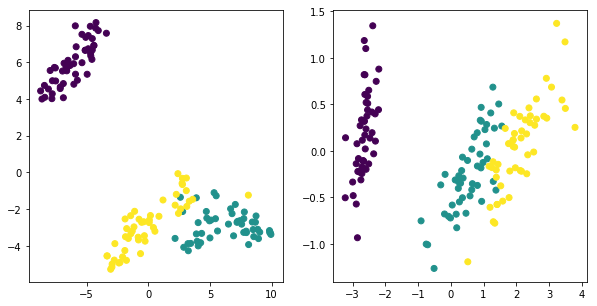

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c =iris.target)
plt.subplot(122)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c =iris.target)
plt.show()